# Impoting Packages

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import calmap
from plotly_calplot import calplot
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-dark-palette')
import sklearn #The one and only. This amazing library holds all the secrets. Containing powerful algorithms packed in a single line of code, this is where the magic will happen.
import sklearn.model_selection # more of sklearn. It is a big library, but trust me it is worth it.
import sklearn.preprocessing 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score,mean_absolute_error,mean_squared_error,precision_score,recall_score, accuracy_score,f1_score
from sklearn.utils import shuffle
import random # Allows us to call random numbers, occasionally very useful.
import pprint#Allows us to neatly display text
from collections import OrderedDict
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import orthogonal_mp
from sklearn.linear_model import BayesianRidge 
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
!pip install calmap --upgrade --quiet #> /dev/null# if not installed.

In [4]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install plotly-calplot --upgrade --quiet #> /dev/null# if not installed.

In [10]:

!pip install TPOT

# IMPORT DATA

In [11]:
# import data

df = pd.read_csv("~/Desktop/flightsdata.csv", dtype={"SCHEDULED_ARRIVAL":"string","SCHEDULED_DEPARTURE":"string","DEPARTURE_TIME":"string","ARRIVAL_TIME":"string","DEPATURE_DELAY":"string","ARRIVAL_DELAY":"string"}, index_col='FLIGHT_NUMBER')
df 

/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/1809405732.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("~/Desktop/flightsdata.csv", dtype={"SCHEDULED_ARRIVAL":"string","SCHEDULED_DEPARTURE":"string","DEPARTURE_TIME":"string","ARRIVAL_TIME":"string","DEPATURE_DELAY":"string","ARRIVAL_DELAY":"string"}, index_col='FLIGHT_NUMBER')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
98,2015,1,1,4,AS,N407AS,ANC,SEA,0005,2354,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2336,2015,1,1,4,AA,N3KUAA,LAX,PBI,0010,0002,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,0750,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
840,2015,1,1,4,US,N171US,SFO,CLT,0020,0018,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,0806,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
258,2015,1,1,4,AA,N3HYAA,LAX,MIA,0020,0015,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,0805,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
135,2015,1,1,4,AS,N527AS,SEA,ANC,0025,0024,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,0320,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,2015,12,31,4,B6,N657JB,LAX,BOS,2359,2355,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,0819,0753,-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN
745,2015,12,31,4,B6,N828JB,JFK,PSE,2359,2355,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,0446,0430,-16,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1503,2015,12,31,4,B6,N913JB,JFK,SJU,2359,2350,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,0440,0432,-8,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# view all

pd.set_option('display.max_columns', None)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
98,2015,1,1,4,AS,N407AS,ANC,SEA,0005,2354,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2336,2015,1,1,4,AA,N3KUAA,LAX,PBI,0010,0002,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,0750,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
840,2015,1,1,4,US,N171US,SFO,CLT,0020,0018,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,0806,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
258,2015,1,1,4,AA,N3HYAA,LAX,MIA,0020,0015,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,0805,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
135,2015,1,1,4,AS,N527AS,SEA,ANC,0025,0024,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,0320,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# CLEAN

In [13]:
# get info

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819079 entries, 98 to 839
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5819079 non-null  int64  
 1   MONTH                5819079 non-null  int64  
 2   DAY                  5819079 non-null  int64  
 3   DAY_OF_WEEK          5819079 non-null  int64  
 4   AIRLINE              5819079 non-null  object 
 5   TAIL_NUMBER          5804358 non-null  object 
 6   ORIGIN_AIRPORT       5819079 non-null  object 
 7   DESTINATION_AIRPORT  5819079 non-null  object 
 8   SCHEDULED_DEPARTURE  5819079 non-null  string 
 9   DEPARTURE_TIME       5732926 non-null  string 
 10  DEPARTURE_DELAY      5732926 non-null  float64
 11  TAXI_OUT             5730032 non-null  float64
 12  WHEELS_OFF           5730032 non-null  float64
 13  SCHEDULED_TIME       5819073 non-null  float64
 14  ELAPSED_TIME         5714008 non-null  float64
 15  A

In [14]:
# remove nan values 

# note that we are removing nan values in a certain subset because for other columns 
# such as cancellation, airline_delay, etc., "nan" is used if the condition doesnt 
# apply, not that it is a blank value. also for other condition such as if the 
# depature time, arrival time is blank, doesn't mean it needs to be removed but becasue 
# the flight is cancelled and we don't want to remove all the cancelled flights for
# EDA purposes. so we are assuming for those exempted columns they have an accurate
# content and we will only be removing if they are missing other contents in the row/
# the flight info itself such as missing dates, airline, airport, etc.

df.dropna(subset = ['YEAR'
, 'MONTH'
, 'DAY'             
, 'DAY_OF_WEEK'     
, 'AIRLINE'         
, 'TAIL_NUMBER'     
, 'ORIGIN_AIRPORT'  
, 'DESTINATION_AIRPORT'], inplace=True)     

In [15]:
# get updated info

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5804358 entries, 98 to 839
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5804358 non-null  int64  
 1   MONTH                5804358 non-null  int64  
 2   DAY                  5804358 non-null  int64  
 3   DAY_OF_WEEK          5804358 non-null  int64  
 4   AIRLINE              5804358 non-null  object 
 5   TAIL_NUMBER          5804358 non-null  object 
 6   ORIGIN_AIRPORT       5804358 non-null  object 
 7   DESTINATION_AIRPORT  5804358 non-null  object 
 8   SCHEDULED_DEPARTURE  5804358 non-null  string 
 9   DEPARTURE_TIME       5732926 non-null  string 
 10  DEPARTURE_DELAY      5732926 non-null  float64
 11  TAXI_OUT             5730032 non-null  float64
 12  WHEELS_OFF           5730032 non-null  float64
 13  SCHEDULED_TIME       5804352 non-null  float64
 14  ELAPSED_TIME         5714008 non-null  float64
 15  A

In [16]:
# view all

pd.set_option('display.max_columns', None)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
98,2015,1,1,4,AS,N407AS,ANC,SEA,0005,2354,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2336,2015,1,1,4,AA,N3KUAA,LAX,PBI,0010,0002,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,0750,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
840,2015,1,1,4,US,N171US,SFO,CLT,0020,0018,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,0806,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
258,2015,1,1,4,AA,N3HYAA,LAX,MIA,0020,0015,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,0805,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
135,2015,1,1,4,AS,N527AS,SEA,ANC,0025,0024,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,0320,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# add column to describe whether flight was delayed or not.

df['DEPARTURE_DELAYED_?'] = np.where(df['DEPARTURE_DELAY']>0, 'Yes', 'No')
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAYED_?
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
98,2015,1,1,4,AS,N407AS,ANC,SEA,0005,2354,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
2336,2015,1,1,4,AA,N3KUAA,LAX,PBI,0010,0002,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,0750,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
840,2015,1,1,4,US,N171US,SFO,CLT,0020,0018,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,0806,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
258,2015,1,1,4,AA,N3HYAA,LAX,MIA,0020,0015,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,0805,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
135,2015,1,1,4,AS,N527AS,SEA,ANC,0025,0024,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,0320,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,2015,12,31,4,B6,N657JB,LAX,BOS,2359,2355,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,0819,0753,-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
745,2015,12,31,4,B6,N828JB,JFK,PSE,2359,2355,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,0446,0430,-16,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
1503,2015,12,31,4,B6,N913JB,JFK,SJU,2359,2350,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,0440,0432,-8,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No


In [18]:
# refining departure_delayed_? column for cancelled flights

df.loc[(df['CANCELLED'] == 1), 'DEPARTURE_DELAYED_?'] = 'NaN'

In [19]:
# look at data

df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAYED_?
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
98,2015,1,1,4,AS,N407AS,ANC,SEA,0005,2354,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
2336,2015,1,1,4,AA,N3KUAA,LAX,PBI,0010,0002,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,0750,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
840,2015,1,1,4,US,N171US,SFO,CLT,0020,0018,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,0806,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
258,2015,1,1,4,AA,N3HYAA,LAX,MIA,0020,0015,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,0805,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
135,2015,1,1,4,AS,N527AS,SEA,ANC,0025,0024,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,0320,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,2015,12,31,4,B6,N657JB,LAX,BOS,2359,2355,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,0819,0753,-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
745,2015,12,31,4,B6,N828JB,JFK,PSE,2359,2355,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,0446,0430,-16,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
1503,2015,12,31,4,B6,N913JB,JFK,SJU,2359,2350,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,0440,0432,-8,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No


In [20]:
# check DEPARTURE_DELAYED_? columns for cancelled flights. looks good!

cancelled_df = df[df['CANCELLED']== 1]
cancelled_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAYED_?
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
136,2015,1,1,4,AS,N431AS,ANC,SEA,0135,<NA>,NaN,NaN,NaN,205.0,NaN,NaN,1448,NaN,NaN,0600,<NA>,<NA>,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN
2459,2015,1,1,4,AA,N3BDAA,PHX,DFW,0200,<NA>,NaN,NaN,NaN,120.0,NaN,NaN,868,NaN,NaN,0500,<NA>,<NA>,0,1,B,NaN,NaN,NaN,NaN,NaN,NaN
5254,2015,1,1,4,OO,N746SK,MAF,IAH,0510,<NA>,NaN,NaN,NaN,87.0,NaN,NaN,429,NaN,NaN,0637,<NA>,<NA>,0,1,B,NaN,NaN,NaN,NaN,NaN,NaN
2859,2015,1,1,4,MQ,N660MQ,SGF,DFW,0525,<NA>,NaN,NaN,NaN,95.0,NaN,NaN,364,NaN,NaN,0700,<NA>,<NA>,0,1,B,NaN,NaN,NaN,NaN,NaN,NaN
5460,2015,1,1,4,OO,N583SW,RDD,SFO,0530,<NA>,NaN,NaN,NaN,90.0,NaN,NaN,199,NaN,NaN,0700,<NA>,<NA>,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442,2015,12,31,4,EV,N12167,IAH,HOB,1800,<NA>,NaN,NaN,NaN,107.0,NaN,NaN,501,NaN,NaN,1847,<NA>,<NA>,0,1,B,NaN,NaN,NaN,NaN,NaN,NaN
5359,2015,12,31,4,OO,N915SW,DEN,MAF,1940,<NA>,NaN,NaN,NaN,105.0,NaN,NaN,563,NaN,NaN,2225,<NA>,<NA>,0,1,B,NaN,NaN,NaN,NaN,NaN,NaN
2245,2015,12,31,4,AA,N880AA,MIA,SAN,2019,<NA>,NaN,NaN,NaN,337.0,NaN,NaN,2267,NaN,NaN,2256,<NA>,<NA>,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [21]:
# look at data again
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAYED_?
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
98,2015,1,1,4,AS,N407AS,ANC,SEA,0005,2354,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
2336,2015,1,1,4,AA,N3KUAA,LAX,PBI,0010,0002,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,0750,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
840,2015,1,1,4,US,N171US,SFO,CLT,0020,0018,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,0806,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
258,2015,1,1,4,AA,N3HYAA,LAX,MIA,0020,0015,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,0805,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
135,2015,1,1,4,AS,N527AS,SEA,ANC,0025,0024,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,0320,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,2015,12,31,4,B6,N657JB,LAX,BOS,2359,2355,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,0819,0753,-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
745,2015,12,31,4,B6,N828JB,JFK,PSE,2359,2355,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,0446,0430,-16,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No
1503,2015,12,31,4,B6,N913JB,JFK,SJU,2359,2350,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,0440,0432,-8,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No


In [22]:
# get info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5804358 entries, 98 to 839
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   TAIL_NUMBER          object 
 6   ORIGIN_AIRPORT       object 
 7   DESTINATION_AIRPORT  object 
 8   SCHEDULED_DEPARTURE  string 
 9   DEPARTURE_TIME       string 
 10  DEPARTURE_DELAY      float64
 11  TAXI_OUT             float64
 12  WHEELS_OFF           float64
 13  SCHEDULED_TIME       float64
 14  ELAPSED_TIME         float64
 15  AIR_TIME             float64
 16  DISTANCE             int64  
 17  WHEELS_ON            float64
 18  TAXI_IN              float64
 19  SCHEDULED_ARRIVAL    string 
 20  ARRIVAL_TIME         string 
 21  ARRIVAL_DELAY        string 
 22  DIVERTED             int64  
 23  CANCELLED            int64  
 24  C

In [23]:
# finding out airline with most flights

df['AIRLINE'].value_counts()

WN    1260450
DL     875855
AA     723673
OO     588248
EV     571907
UA     509556
MQ     294584
B6     267048
US     194825
AS     172521
NK     117379
F9      90290
HA      76119
VX      61903
Name: AIRLINE, dtype: int64

In [24]:
# count amoount of delays

df['DEPARTURE_DELAYED_?'].value_counts()

No     3606117
Yes    2123078
NaN      75163
Name: DEPARTURE_DELAYED_?, dtype: int64

Looks like out of 5804358 flights, 3606117 didnt get delayed, 2123078 got delayed and 75163 got cancelled.

That's 62% not delayed, 37% delayed and 1% cancelled.

In [25]:
# count of delay status by airline

delaystatus_byairline = df.groupby(['AIRLINE','DEPARTURE_DELAYED_?']).size()
delaystatus_byairline

AIRLINE  DEPARTURE_DELAYED_?
AA       NaN                      8608
         No                     469515
         Yes                    245550
AS       NaN                       669
         No                     128311
         Yes                     43541
B6       NaN                      4276
         No                     160760
         Yes                    102012
DL       NaN                      3798
         No                     589672
         Yes                    282385
EV       NaN                     15161
         No                     387243
         Yes                    169503
F9       NaN                        42
         No                      55389
         Yes                     34859
HA       NaN                        18
         No                      55961
         Yes                     20140
MQ       NaN                     14977
         No                     186375
         Yes                     93232
NK       NaN                      2

In [26]:
# sort each airline's flihgt total before plotting 

delaystatus_byairline_sort = delaystatus_byairline.groupby(level=[0]).sum().sort_values(ascending=False)
delaystatus_byairline_sort

AIRLINE
WN    1260450
DL     875855
AA     723673
OO     588248
EV     571907
UA     509556
MQ     294584
B6     267048
US     194825
AS     172521
NK     117379
F9      90290
HA      76119
VX      61903
dtype: int64

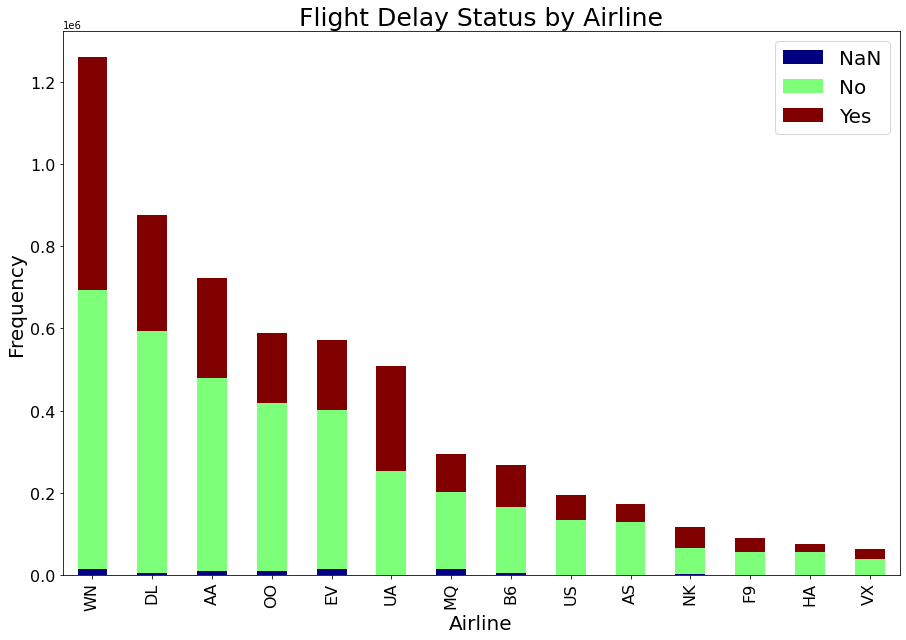

In [27]:
# plot graph
# Delay counts by Airline

cmp = plt.cm.get_cmap('jet')
delaystatus_byairline_graph = delaystatus_byairline.reindex(index=delaystatus_byairline_sort.index, level=0).unstack().plot.bar(figsize=(15, 10), stacked=True, fontsize=16, cmap=cmp)
delaystatus_byairline_graph.set_xlabel("Airline",fontdict={'fontsize':20})
delaystatus_byairline_graph.set_ylabel("Frequency",fontdict={'fontsize':20})
delaystatus_byairline_graph.set_title("Flight Delay Status by Airline",fontdict={'fontsize':25})
delaystatus_byairline_graph.legend(loc=1,fontsize=20)

Text(0.5, 1.0, 'Flight Delay (Minutes) Frequency')

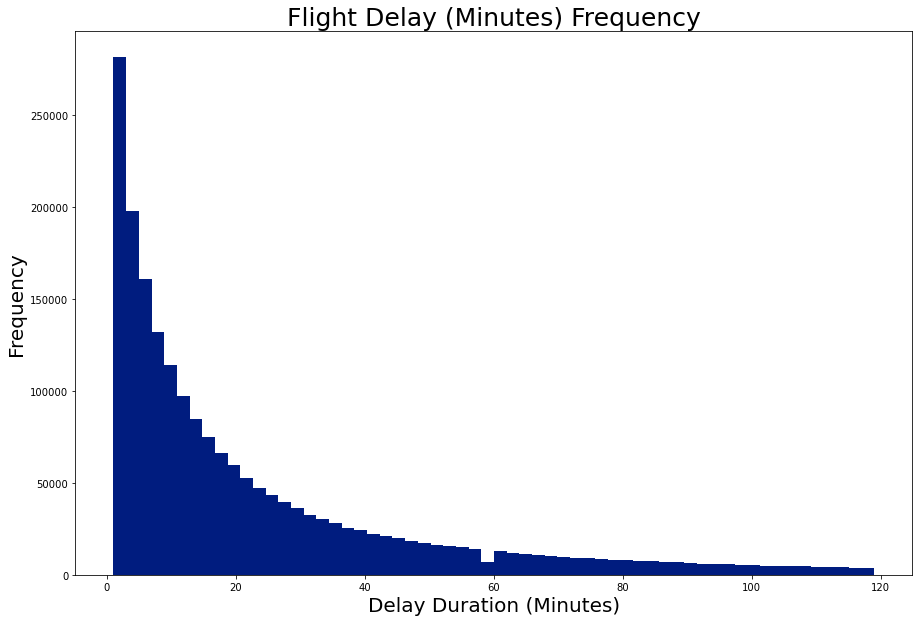

In [28]:
# Flight delay duration frequency

flightdelayduartion_graph = df.query('(DEPARTURE_DELAY > 0) and (DEPARTURE_DELAY < 120)')['DEPARTURE_DELAY'].plot(kind='hist', bins=60, title= 'Flight Delay (Minutes) Frequency', figsize=(15, 10))
flightdelayduartion_graph.set_xlabel("Delay Duration (Minutes)",fontdict={'fontsize':20})
flightdelayduartion_graph.set_ylabel("Frequency",fontdict={'fontsize':20})
flightdelayduartion_graph.set_title("Flight Delay (Minutes) Frequency",fontdict={'fontsize':25})

In [29]:
# count of delay status by origin airport

delaystatus_byoriginairport = df.groupby(['ORIGIN_AIRPORT','DEPARTURE_DELAYED_?']).size()
delaystatus_byoriginairport

ORIGIN_AIRPORT  DEPARTURE_DELAYED_?
10135           No                      158
                Yes                      68
10136           NaN                       7
                No                      148
                Yes                      34
                                       ... 
YAK             No                      529
                Yes                     128
YUM             NaN                      23
                No                     1515
                Yes                     339
Length: 2393, dtype: int64

In [30]:
# sort each airline's flihgt total before plotting 

delaystatus_byoriginairport_sort = delaystatus_byoriginairport.groupby(level=[0]).sum().sort_values(ascending=False)[:10]
delaystatus_byoriginairport_sort

ORIGIN_AIRPORT
ATL    346638
ORD    284634
DFW    239042
DEN    195486
LAX    194292
SFO    147504
PHX    146550
IAH    146017
LAS    133022
MSP    112021
dtype: int64

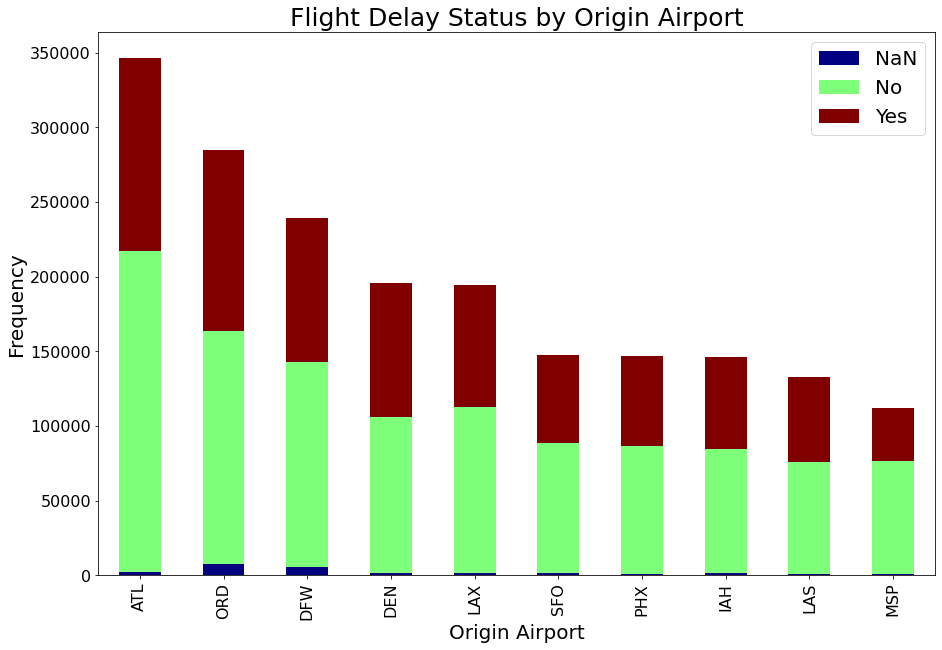

In [31]:
# plot graph
# Delay counts by Airline

cmp = plt.cm.get_cmap('jet')
delaystatus_byoriginairport_graph = delaystatus_byoriginairport.reindex(index=delaystatus_byoriginairport_sort.index, level=0).unstack().plot.bar(figsize=(15, 10), stacked=True, fontsize=16, cmap=cmp)
delaystatus_byoriginairport_graph.set_xlabel("Origin Airport",fontdict={'fontsize':20})
delaystatus_byoriginairport_graph.set_ylabel("Frequency",fontdict={'fontsize':20})
delaystatus_byoriginairport_graph.set_title("Flight Delay Status by Origin Airport",fontdict={'fontsize':25})
delaystatus_byoriginairport_graph.legend(loc=1,fontsize=20)

In [32]:
# creating a calendar date map
# first we need to format the data into the right date format

df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

Text(0.5, 0.7, 'US Flight Cancellations 2015')

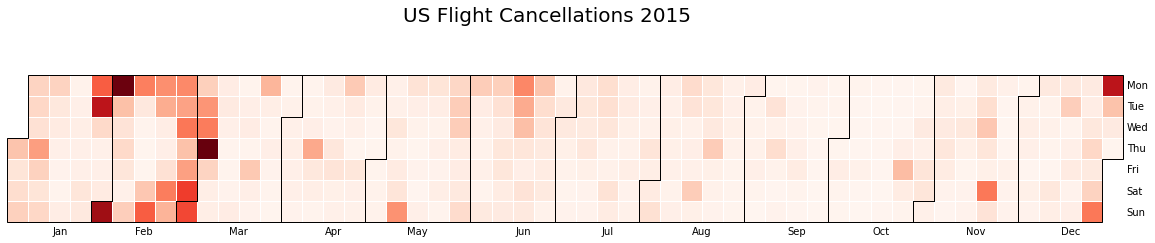

In [33]:
# calendar delay map

delaymap_graph = df.groupby('DATE')['CANCELLED'].mean()
fig, ax = plt.subplots(figsize=(20,10))
calmap.yearplot(delaymap_graph, year=2015, monthly_border=True)
fig.suptitle('US Flight Cancellations 2015', x= 0.5, y=0.7, fontsize=20)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5804358 entries, 98 to 839
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   YEAR                 int64         
 1   MONTH                int64         
 2   DAY                  int64         
 3   DAY_OF_WEEK          int64         
 4   AIRLINE              object        
 5   TAIL_NUMBER          object        
 6   ORIGIN_AIRPORT       object        
 7   DESTINATION_AIRPORT  object        
 8   SCHEDULED_DEPARTURE  string        
 9   DEPARTURE_TIME       string        
 10  DEPARTURE_DELAY      float64       
 11  TAXI_OUT             float64       
 12  WHEELS_OFF           float64       
 13  SCHEDULED_TIME       float64       
 14  ELAPSED_TIME         float64       
 15  AIR_TIME             float64       
 16  DISTANCE             int64         
 17  WHEELS_ON            float64       
 18  TAXI_IN              float64       
 19  SCHEDULED_ARRIVAL    str

In [35]:
# replace categorical columns to numeric values for delayed yes, no, NaN

df['DEPARTURE_DELAYED_?'] = df['DEPARTURE_DELAYED_?'].replace({'Yes': 1, 'No': 0, 'NaN' :3})
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAYED_?,DATE
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
98,2015,1,1,4,AS,N407AS,ANC,SEA,0005,2354,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
2336,2015,1,1,4,AA,N3KUAA,LAX,PBI,0010,0002,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,0750,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
840,2015,1,1,4,US,N171US,SFO,CLT,0020,0018,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,0806,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
258,2015,1,1,4,AA,N3HYAA,LAX,MIA,0020,0015,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,0805,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
135,2015,1,1,4,AS,N527AS,SEA,ANC,0025,0024,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,0320,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,2015,12,31,4,B6,N657JB,LAX,BOS,2359,2355,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,0819,0753,-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-12-31
745,2015,12,31,4,B6,N828JB,JFK,PSE,2359,2355,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,0446,0430,-16,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-12-31
1503,2015,12,31,4,B6,N913JB,JFK,SJU,2359,2350,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,0440,0432,-8,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-12-31


In [36]:
# correlation 

corrmat = df.corr()
corrmat

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAYED_?
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008812,-0.008524,-0.021994,-0.013117,-0.004946,0.011286,0.001871,0.003379,0.011794,-0.008917,0.002095,-0.001068,-0.047476,-0.002214,0.007925,0.011262,0.004839,-0.008682,-0.057747
DAY,NaN,0.008812,1.000000,0.001580,-0.000176,-0.002661,-0.003318,0.003217,0.001419,0.001923,0.003363,-0.004294,-0.001656,0.001995,-0.005651,-0.007375,-0.000510,0.006728,0.008869,0.008882,-0.006969
DAY_OF_WEEK,NaN,-0.008524,0.001580,1.000000,-0.011510,-0.020639,0.004060,0.015166,0.011510,0.014284,0.016631,0.005642,0.001111,-0.001486,-0.017173,-0.023674,0.001576,0.011264,-0.018026,-0.006794,-0.010826
DEPARTURE_DELAY,NaN,-0.021994,-0.000176,-0.011510,1.000000,0.058515,0.162582,0.027799,0.030805,0.023495,0.024106,0.058674,0.012784,0.022963,0.033099,0.095917,0.011877,0.621296,0.554802,0.243532,0.481325
TAXI_OUT,NaN,-0.013117,-0.002661,-0.020639,0.058515,1.000000,0.039104,0.112302,0.205195,0.087608,0.072333,0.032584,0.003221,0.012251,0.005062,0.361659,-0.005988,-0.070290,-0.127824,0.063308,0.051241
WHEELS_OFF,NaN,-0.004946,-0.003318,0.004060,0.162582,0.039104,1.000000,-0.028289,-0.027133,-0.029654,-0.027586,0.695734,-0.038814,0.001667,0.004805,-0.026377,-0.006180,-0.032810,0.156089,-0.008338,0.219755
SCHEDULED_TIME,NaN,0.011286,0.003217,0.015166,0.027799,0.112302,-0.028289,1.000000,0.985260,0.990749,0.984359,0.023414,0.099036,0.014069,-0.036233,0.030445,0.007085,0.033051,-0.044554,-0.001624,0.038657
ELAPSED_TIME,NaN,0.001871,0.001419,0.011510,0.030805,0.205195,-0.027133,0.985260,1.000000,0.990033,0.973696,0.025644,0.156179,NaN,NaN,0.151510,0.004588,-0.001619,-0.091822,0.006735,0.069317
AIR_TIME,NaN,0.003379,0.001923,0.014284,0.023495,0.087608,-0.029654,0.990749,0.990033,1.000000,0.985643,0.022717,0.082292,NaN,NaN,0.056492,0.006631,0.018366,-0.063624,-0.005410,0.066078


<AxesSubplot:>

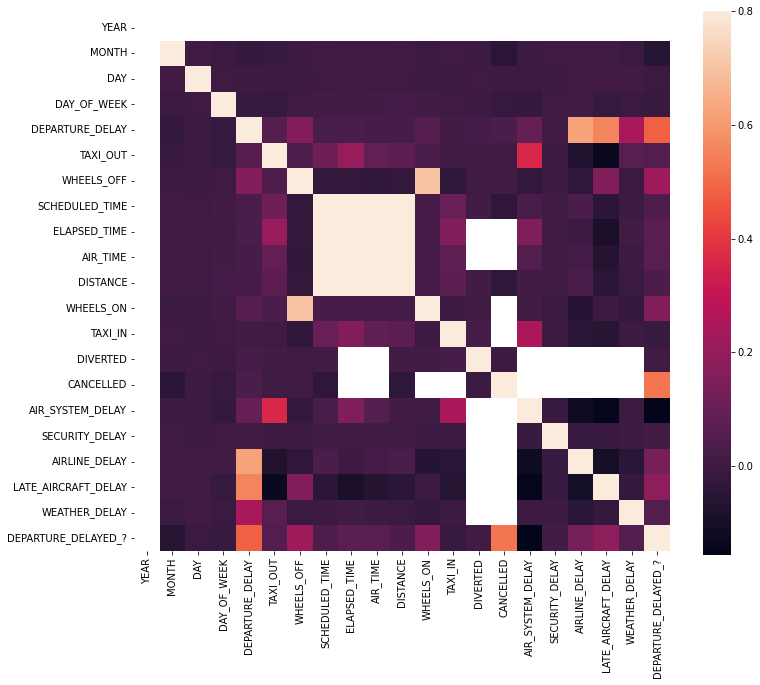

In [37]:
# plotting correlation matrix
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot sns.heatmap(corrmat, vmax = .8, square=True)
sns.heatmap(corrmat, vmax = .8, square=True)

# CLEANING PT. 2 - PREP FOR MACHINE LEARNING)

In [38]:
# defining a different dataframe for the previous data so we can use this one 
# specfically for machine learning.

df2 = df
df2

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAYED_?,DATE
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
98,2015,1,1,4,AS,N407AS,ANC,SEA,0005,2354,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
2336,2015,1,1,4,AA,N3KUAA,LAX,PBI,0010,0002,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,0750,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
840,2015,1,1,4,US,N171US,SFO,CLT,0020,0018,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,0806,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
258,2015,1,1,4,AA,N3HYAA,LAX,MIA,0020,0015,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,0805,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
135,2015,1,1,4,AS,N527AS,SEA,ANC,0025,0024,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,0320,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,2015,12,31,4,B6,N657JB,LAX,BOS,2359,2355,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,0819,0753,-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-12-31
745,2015,12,31,4,B6,N828JB,JFK,PSE,2359,2355,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,0446,0430,-16,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-12-31
1503,2015,12,31,4,B6,N913JB,JFK,SJU,2359,2350,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,0440,0432,-8,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-12-31


In [39]:
# look at data info

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5804358 entries, 98 to 839
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   YEAR                 int64         
 1   MONTH                int64         
 2   DAY                  int64         
 3   DAY_OF_WEEK          int64         
 4   AIRLINE              object        
 5   TAIL_NUMBER          object        
 6   ORIGIN_AIRPORT       object        
 7   DESTINATION_AIRPORT  object        
 8   SCHEDULED_DEPARTURE  string        
 9   DEPARTURE_TIME       string        
 10  DEPARTURE_DELAY      float64       
 11  TAXI_OUT             float64       
 12  WHEELS_OFF           float64       
 13  SCHEDULED_TIME       float64       
 14  ELAPSED_TIME         float64       
 15  AIR_TIME             float64       
 16  DISTANCE             int64         
 17  WHEELS_ON            float64       
 18  TAXI_IN              float64       
 19  SCHEDULED_ARRIVAL    str

In [40]:
# since we are predicting delay, we will remove flights that are cancelled.

df2_updated = df2[df2['CANCELLED'] == 0]

In [41]:
# double check that the cancelled flights are removed

df2_updated.CANCELLED.unique()

array([0])

In [42]:
# double check that the cancelled flights are removed

df2_updated[df2_updated['CANCELLED']== '1']

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAYED_?,DATE
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [43]:
# filtering to origin airport DEN

df2_updated = df2_updated[df2_updated['ORIGIN_AIRPORT'] == 'DEN']

In [44]:
# look at data 

df2_updated

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAYED_?,DATE
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2336,2015,1,1,4,DL,N958DN,DEN,ATL,0030,0024,-6.0,12.0,36.0,173.0,149.0,133.0,1199,449.0,4.0,0523,0453,-30,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
2392,2015,1,1,4,AA,N3HRAA,DEN,MIA,0120,0141,21.0,12.0,153.0,227.0,208.0,188.0,1709,701.0,8.0,0707,0709,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,2015-01-01
328,2015,1,1,4,AA,N4XKAA,DEN,DFW,0530,0623,53.0,32.0,655.0,125.0,138.0,96.0,641,931.0,10.0,0835,0941,66,0,0,NaN,13.0,0.0,53.0,0.0,0.0,1,2015-01-01
2599,2015,1,1,4,OO,N435SW,DEN,LAX,0545,0658,73.0,11.0,709.0,150.0,133.0,112.0,862,801.0,10.0,0715,0811,56,0,0,NaN,0.0,0.0,56.0,0.0,0.0,1,2015-01-01
403,2015,1,1,4,US,N660AW,DEN,PHX,0550,0550,0.0,15.0,605.0,119.0,109.0,91.0,602,736.0,3.0,0749,0739,-10,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2015,12,31,4,F9,N701FR,DEN,MCO,2359,2354,-5.0,12.0,6.0,206.0,190.0,170.0,1546,456.0,8.0,0525,0504,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-12-31
566,2015,12,31,4,F9,N925FR,DEN,RDU,2359,2356,-3.0,15.0,11.0,185.0,170.0,149.0,1436,440.0,6.0,0504,0446,-18,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-12-31
300,2015,12,31,4,F9,N949FR,DEN,TPA,2359,0005,6.0,17.0,22.0,199.0,184.0,161.0,1506,503.0,6.0,0518,0509,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,2015-12-31


In [45]:
# filtering to destination airport LGA

df2_updated = df2_updated[df2_updated['DESTINATION_AIRPORT'] == 'LGA']

In [46]:
# look at data 

df2_updated

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAYED_?,DATE
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1946,2015,1,1,4,DL,N333NW,DEN,LGA,0730,0724,-6.0,28.0,752.0,229.0,205.0,167.0,1620,1239.0,10.0,1319,1249,-30,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-01-01
928,2015,1,1,4,DL,N335NW,DEN,LGA,0930,0940,10.0,13.0,953.0,221.0,192.0,172.0,1620,1445.0,7.0,1511,1452,-19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,2015-01-01
1577,2015,1,1,4,UA,N33203,DEN,LGA,1020,1031,11.0,16.0,1047.0,222.0,205.0,181.0,1620,1548.0,8.0,1602,1556,-6,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,2015-01-01
393,2015,1,1,4,WN,N236WN,DEN,LGA,1030,1058,28.0,11.0,1109.0,220.0,193.0,178.0,1620,1607.0,4.0,1610,1611,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,2015-01-01
754,2015,1,1,4,UA,N434UA,DEN,LGA,1245,1314,29.0,12.0,1326.0,224.0,187.0,170.0,1620,1816.0,5.0,1829,1821,-8,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2015,12,31,4,UA,N480UA,DEN,LGA,0818,0810,-8.0,28.0,838.0,221.0,203.0,172.0,1620,1330.0,3.0,1359,1333,-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-12-31
303,2015,12,31,4,UA,N465UA,DEN,LGA,1005,1003,-2.0,12.0,1015.0,222.0,193.0,176.0,1620,1511.0,5.0,1547,1516,-31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-12-31
3009,2015,12,31,4,WN,N7715E,DEN,LGA,1040,1038,-2.0,19.0,1057.0,220.0,200.0,176.0,1620,1553.0,5.0,1620,1558,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-12-31


In [47]:
# removing the columns that has nothing to do with delays /
# is a byproduct of a delay / is already the criteria

df2_updated.drop(columns=['YEAR'], inplace=True)
df2_updated.drop(columns=['TAIL_NUMBER'], inplace=True)
df2_updated.drop(columns=['TAXI_OUT'], inplace=True)
df2_updated.drop(columns=['WHEELS_OFF'], inplace=True)
df2_updated.drop(columns=['SCHEDULED_TIME'], inplace=True)
df2_updated.drop(columns=['ELAPSED_TIME'], inplace=True)
df2_updated.drop(columns=['AIR_TIME'], inplace=True)
df2_updated.drop(columns=['WHEELS_ON'], inplace=True)
df2_updated.drop(columns=['TAXI_IN'], inplace=True)
df2_updated.drop(columns=['SCHEDULED_ARRIVAL'], inplace=True)
df2_updated.drop(columns=['ARRIVAL_TIME'], inplace=True)
df2_updated.drop(columns=['ARRIVAL_DELAY'], inplace=True)
df2_updated.drop(columns=['DIVERTED'], inplace=True)
df2_updated.drop(columns=['CANCELLED'], inplace=True)
df2_updated.drop(columns=['CANCELLATION_REASON'], inplace=True)
df2_updated.drop(columns=['AIR_SYSTEM_DELAY'], inplace=True)
df2_updated.drop(columns=['SECURITY_DELAY'], inplace=True)
df2_updated.drop(columns=['AIRLINE_DELAY'], inplace=True)
df2_updated.drop(columns=['LATE_AIRCRAFT_DELAY'], inplace=True)
df2_updated.drop(columns=['WEATHER_DELAY'], inplace=True)
df2_updated.drop(columns=['DEPARTURE_DELAY'], inplace=True)
df2_updated.drop(columns=['DISTANCE'], inplace=True)
df2_updated.drop(columns=['DEPARTURE_TIME'], inplace=True)
df2_updated.drop(columns=['DAY'], inplace=True)
df2_updated.drop(columns=['DESTINATION_AIRPORT'], inplace=True)
df2_updated.drop(columns=['DAY_OF_WEEK'], inplace=True)
df2_updated.drop(columns=['DESTINATION_AIRPORT'], inplace=True)
df2_updated.drop(columns=['ORIGIN_AIRPORT'], inplace=True)

/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/1215516285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated.drop(columns=['YEAR'], inplace=True)
/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/1215516285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated.drop(columns=['TAIL_NUMBER'], inplace=True)
/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/1215516285.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

KeyError: "['DESTINATION_AIRPORT'] not found in axis"

In [48]:
# converting the times to correct format 

df2_updated.SCHEDULED_DEPARTURE = df2_updated.SCHEDULED_DEPARTURE.astype(str)
df2_updated.SCHEDULED_DEPARTURE = df2_updated.SCHEDULED_DEPARTURE.str[:2] + ':' + df2_updated.SCHEDULED_DEPARTURE.str[-2:]

/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/3205695143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated.SCHEDULED_DEPARTURE = df2_updated.SCHEDULED_DEPARTURE.astype(str)
/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/3205695143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated.SCHEDULED_DEPARTURE = df2_updated.SCHEDULED_DEPARTURE.str[:2] + ':' + df2_updated.SCHEDULED_DEPARTURE.str[-2:]


In [49]:
# double checking

df2_updated

,MONTH,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAYED_?,DATE
FLIGHT_NUMBER,,,,,,
1946,1,DL,DEN,07:30,0,2015-01-01
928,1,DL,DEN,09:30,1,2015-01-01
1577,1,UA,DEN,10:20,1,2015-01-01
393,1,WN,DEN,10:30,1,2015-01-01
754,1,UA,DEN,12:45,1,2015-01-01
...,...,...,...,...,...,...
347,12,UA,DEN,08:18,0,2015-12-31
303,12,UA,DEN,10:05,0,2015-12-31
3009,12,WN,DEN,10:40,0,2015-12-31


In [51]:
# converting time into timebands in order to make it numeric later

pip install python-dateutil

SyntaxError: invalid syntax (1325674675.py, line 3)

In [52]:
import dateutil

In [53]:
# converting 

def get_time_band(hour):
    return (
        "Morning" if 5 <= hour <= 11
        else
        "Afternoon" if 12 <= hour <= 17
        else
        "Evening" if 18 <= hour <= 22
        else
        "Night"
    )

df2_updated['time_band'] = df2_updated.SCHEDULED_DEPARTURE.apply(lambda x: get_time_band(dateutil.parser.parse(x).hour)) 



/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/2374059975.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated['time_band'] = df2_updated.SCHEDULED_DEPARTURE.apply(lambda x: get_time_band(dateutil.parser.parse(x).hour))


In [54]:
# dropping the column since we dont need it anymore

df2_updated.drop(columns=['SCHEDULED_DEPARTURE'], inplace=True)

/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/3587837008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated.drop(columns=['SCHEDULED_DEPARTURE'], inplace=True)


In [55]:
# double checking

df2_updated

,MONTH,AIRLINE,ORIGIN_AIRPORT,DEPARTURE_DELAYED_?,DATE,time_band
FLIGHT_NUMBER,,,,,,
1946,1,DL,DEN,0,2015-01-01,Morning
928,1,DL,DEN,1,2015-01-01,Morning
1577,1,UA,DEN,1,2015-01-01,Morning
393,1,WN,DEN,1,2015-01-01,Morning
754,1,UA,DEN,1,2015-01-01,Afternoon
...,...,...,...,...,...,...
347,12,UA,DEN,0,2015-12-31,Morning
303,12,UA,DEN,0,2015-12-31,Morning
3009,12,WN,DEN,0,2015-12-31,Morning


In [56]:
# converting the number months into months name for ease in encoding 

df2_updated['MONTH'] = df2_updated['MONTH'].replace(1,'January')
df2_updated['MONTH'] = df2_updated['MONTH'].replace(2,'February')
df2_updated['MONTH'] = df2_updated['MONTH'].replace(3,'March')
df2_updated['MONTH'] = df2_updated['MONTH'].replace(4,'April')
df2_updated['MONTH'] = df2_updated['MONTH'].replace(5,'May')
df2_updated['MONTH'] = df2_updated['MONTH'].replace(6,'June')
df2_updated['MONTH'] = df2_updated['MONTH'].replace(7,'July')
df2_updated['MONTH'] = df2_updated['MONTH'].replace(8,'August')
df2_updated['MONTH'] = df2_updated['MONTH'].replace(9,'September')
df2_updated['MONTH'] = df2_updated['MONTH'].replace(10,'October')
df2_updated['MONTH'] = df2_updated['MONTH'].replace(11,'November')
df2_updated['MONTH'] = df2_updated['MONTH'].replace(12,'December')

/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/635911515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated['MONTH'] = df2_updated['MONTH'].replace(1,'January')
/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/635911515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated['MONTH'] = df2_updated['MONTH'].replace(2,'February')
/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/635911515.py:5: SettingWithCopyWarning: 
A value is trying to 

In [57]:
# double check

df2_updated

,MONTH,AIRLINE,ORIGIN_AIRPORT,DEPARTURE_DELAYED_?,DATE,time_band
FLIGHT_NUMBER,,,,,,
1946,January,DL,DEN,0,2015-01-01,Morning
928,January,DL,DEN,1,2015-01-01,Morning
1577,January,UA,DEN,1,2015-01-01,Morning
393,January,WN,DEN,1,2015-01-01,Morning
754,January,UA,DEN,1,2015-01-01,Afternoon
...,...,...,...,...,...,...
347,December,UA,DEN,0,2015-12-31,Morning
303,December,UA,DEN,0,2015-12-31,Morning
3009,December,WN,DEN,0,2015-12-31,Morning


# ONE HOT ENCODING

In [58]:
# replace categorical columns to numeric values for delayed yes or no

df2_updated['DEPARTURE_DELAYED_?'] = df2_updated['DEPARTURE_DELAYED_?'].replace({'Yes': 1, 'No': 0})
df2_updated

/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/1661007886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated['DEPARTURE_DELAYED_?'] = df2_updated['DEPARTURE_DELAYED_?'].replace({'Yes': 1, 'No': 0})


,MONTH,AIRLINE,ORIGIN_AIRPORT,DEPARTURE_DELAYED_?,DATE,time_band
FLIGHT_NUMBER,,,,,,
1946,January,DL,DEN,0,2015-01-01,Morning
928,January,DL,DEN,1,2015-01-01,Morning
1577,January,UA,DEN,1,2015-01-01,Morning
393,January,WN,DEN,1,2015-01-01,Morning
754,January,UA,DEN,1,2015-01-01,Afternoon
...,...,...,...,...,...,...
347,December,UA,DEN,0,2015-12-31,Morning
303,December,UA,DEN,0,2015-12-31,Morning
3009,December,WN,DEN,0,2015-12-31,Morning


In [59]:
# looking at unique values to know what to convert

df2_updated['MONTH'].value_counts()

July         332
August       324
May          322
June         320
March        319
April        317
September    297
December     283
November     260
February     230
January      225
Name: MONTH, dtype: int64

In [60]:
#  one hot encoding to create columns for unique values 

for x in df2_updated['MONTH'].value_counts().keys(): 
      df2_updated[x]=df2_updated['MONTH'].apply(lambda d: 1 if d==x else 0)
    
# dropping the column since its no longer needed

df2_updated.drop(columns=['MONTH'], inplace=True)

/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/3250325194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated[x]=df2_updated['MONTH'].apply(lambda d: 1 if d==x else 0)
/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/3250325194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated[x]=df2_updated['MONTH'].apply(lambda d: 1 if d==x else 0)
/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/3250325194.py:4: SettingWithCopyWarning: 
A value i

In [61]:
# check the data 

df2_updated.head(10)

,AIRLINE,ORIGIN_AIRPORT,DEPARTURE_DELAYED_?,DATE,time_band,July,August,May,June,March,April,September,December,November,February,January
FLIGHT_NUMBER,,,,,,,,,,,,,,,,
1946,DL,DEN,0,2015-01-01,Morning,0,0,0,0,0,0,0,0,0,0,1
928,DL,DEN,1,2015-01-01,Morning,0,0,0,0,0,0,0,0,0,0,1
1577,UA,DEN,1,2015-01-01,Morning,0,0,0,0,0,0,0,0,0,0,1
393,WN,DEN,1,2015-01-01,Morning,0,0,0,0,0,0,0,0,0,0,1
754,UA,DEN,1,2015-01-01,Afternoon,0,0,0,0,0,0,0,0,0,0,1
303,UA,DEN,1,2015-01-01,Afternoon,0,0,0,0,0,0,0,0,0,0,1
1210,UA,DEN,1,2015-01-01,Afternoon,0,0,0,0,0,0,0,0,0,0,1
482,WN,DEN,1,2015-01-01,Afternoon,0,0,0,0,0,0,0,0,0,0,1
1946,DL,DEN,0,2015-01-02,Morning,0,0,0,0,0,0,0,0,0,0,1


In [62]:
# looking at unique values to know what to convert

df2_updated['AIRLINE'].value_counts()

UA    1735
DL     659
WN     626
F9     209
Name: AIRLINE, dtype: int64

In [63]:
#  one hot encoding to create columns for unique values 

for x in df2_updated['AIRLINE'].value_counts().keys(): 
      df2_updated[x]=df2_updated['AIRLINE'].apply(lambda d: 1 if d==x else 0)
    
# dropping the column since its no longer needed

df2_updated.drop(columns=['AIRLINE'], inplace=True)

/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/415640753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated[x]=df2_updated['AIRLINE'].apply(lambda d: 1 if d==x else 0)
/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/415640753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated[x]=df2_updated['AIRLINE'].apply(lambda d: 1 if d==x else 0)
/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/415640753.py:4: SettingWithCopyWarning: 
A value 

In [64]:
# check the data 

df2_updated.head(10)

,ORIGIN_AIRPORT,DEPARTURE_DELAYED_?,DATE,time_band,July,August,May,June,March,April,September,December,November,February,January,UA,DL,WN,F9
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,
1946,DEN,0,2015-01-01,Morning,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
928,DEN,1,2015-01-01,Morning,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1577,DEN,1,2015-01-01,Morning,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
393,DEN,1,2015-01-01,Morning,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
754,DEN,1,2015-01-01,Afternoon,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
303,DEN,1,2015-01-01,Afternoon,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1210,DEN,1,2015-01-01,Afternoon,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
482,DEN,1,2015-01-01,Afternoon,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1946,DEN,0,2015-01-02,Morning,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [65]:
# remove origin airport column 

df2_updated.drop(columns=['ORIGIN_AIRPORT'], inplace=True)

/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/1331603832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated.drop(columns=['ORIGIN_AIRPORT'], inplace=True)


In [67]:
# remove origin airport column 

df2_updated.drop(columns=['DATE'], inplace=True)

/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/2824981740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated.drop(columns=['DATE'], inplace=True)


In [68]:
# check the data 

df2_updated.head(10)

,DEPARTURE_DELAYED_?,time_band,July,August,May,June,March,April,September,December,November,February,January,UA,DL,WN,F9
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,
1946,0,Morning,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
928,1,Morning,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1577,1,Morning,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
393,1,Morning,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
754,1,Afternoon,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
303,1,Afternoon,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1210,1,Afternoon,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
482,1,Afternoon,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1946,0,Morning,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [69]:
# looking at unique values to know what to convert

df2_updated['time_band'].value_counts()

Morning      1723
Afternoon    1479
Night          27
Name: time_band, dtype: int64

In [70]:
#  one hot encoding to create columns for unique values 

for x in df2_updated['time_band'].value_counts().keys(): 
      df2_updated[x]=df2_updated['time_band'].apply(lambda d: 1 if d==x else 0)
    
# dropping the column since its no longer needed

df2_updated.drop(columns=['time_band'], inplace=True)

/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/3140367895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated[x]=df2_updated['time_band'].apply(lambda d: 1 if d==x else 0)
/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/3140367895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated[x]=df2_updated['time_band'].apply(lambda d: 1 if d==x else 0)
/var/folders/r8/n0t34jhd40v8gvgxbvh2tc0m0000gp/T/ipykernel_31568/3140367895.py:4: SettingWithCopyWarning: 
A

In [71]:
# check the data 

df2_updated.head(10)

,DEPARTURE_DELAYED_?,July,August,May,June,March,April,September,December,November,February,January,UA,DL,WN,F9,Morning,Afternoon,Night
FLIGHT_NUMBER,,,,,,,,,,,,,,,,,,,
1946,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
928,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1577,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
393,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
754,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
303,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1210,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
482,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1946,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0


Looks like all is encoded!

# MACHINE LEARNING

In [72]:
#creating our x datasheet, which contains all our data except for the ['DEPARTURE_DELAYED_?'] column.

x=df2_updated.drop(columns='DEPARTURE_DELAYED_?')


#The ['DEPARTURE_DELAYED_?'] column extracted so we can still use it
y=df2_updated['DEPARTURE_DELAYED_?']

y.head(10)

FLIGHT_NUMBER
1946    0
928     1
1577    1
393     1
754     1
303     1
1210    1
482     1
1946    0
347     1
Name: DEPARTURE_DELAYED_?, dtype: int64

In [98]:
# splitting into train and test

x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=0.2, random_state=18)



In [99]:
# the algorithm we will be using is logistic regression

logistic_regression= LogisticRegression()

In [100]:
# fitting in the data 

logistic_regression.fit(x_training,y_training)

LogisticRegression()

In [101]:
#We initialize the following variables that help us count the number of True Positives, False Positives, etc.

TP=0
FP=0
TN=0
FN=0


#We use a loop to count the number of TN, TP, TN, FN. Each time we detech one, we add a '1' to the corresponding variable

for i in range(len(x_testing)):
  
    if logistic_regression.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==1:
                                       TP=TP+1
    if logistic_regression.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==0:
                                       FP=FP+1      
    if logistic_regression.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==0:
                                      TN=TN+1    
                                      
    if logistic_regression.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==1:
                                       FN=FN+1   
#Printing our results

print ("Logistic Regression", "True Positives:",TP, "False Positives:",FP,"True Negatives:",TN , "False Negatives:", FN) 


#Calculating the 'Recall' metric with this simple formula

log_recall=TP/(TP+FN)

#Printing our the 'Recall' metric in %

print("Logistic Regression Recall On Training Data:", log_recall *100,'%')


Logistic Regression True Positives: 219 False Positives: 163 True Negatives: 147 False Negatives: 117
Logistic Regression Recall On Training Data: 65.17857142857143 %


In [104]:
# update

#we initialize a class weights for our two labels : 1 (churned) and 0 (churned) at 70-30

class_weights ={1: 0.85, 0: 0.15}

#we create a new logistic regression model optimized for a better recall and retrain it on our data

logistic_regression_opt= LogisticRegression(class_weight=class_weights)
logistic_regression_opt.fit(x_training,y_training)

LogisticRegression(class_weight={0: 0.15, 1: 0.85})

In [105]:
# check updated recall on trainig data 


TP=0
TN=0
FP=0
FN=0

for i in range(len(x_testing)):
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==1:
                                       TP=TP+1
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==0:
                                       FP=FP+1      
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==0:
                                       TN=TN+1    
                                       
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==1:
                                       FN=FN+1   

print ("Logistic Regression", "True Positives:",TP, "False Positives:",FP,"True Negatives:",TN , "False Negatives:", FN) 

log_recall=TP/(TP+FN)

print("Logistic Regression Recall On Training Data:", log_recall *100,'%')


Logistic Regression True Positives: 336 False Positives: 310 True Negatives: 0 False Negatives: 0
Logistic Regression Recall On Training Data: 100.0 %


In [124]:
#These prompts will ask the customer representative to type in the answers so that we can input the data

month = input ("What month is your flight? (January, February, etc) Please note input is case sensitive.")
airline = input ("What airline are you flying? (UA, DL, WN, F9)")
time=input("what timeband is your flight? (Morning, Afternoon, Night)")

What month is your flight? (January, February, etc) Please note input is case sensitive.January
What airline are you flying? (UA, DL, WN, F9)F9
what timeband is your flight? (Morning, Afternoon, Night)Night


In [125]:
#create columns, all at zero to begin with.

January_formatted=0
February_formatted=0
March_formatted=0
April_formatted=0
May_formatted=0
June_formatted=0
July_formatted=0
August_formatted=0
September_formatted=0
November_formatted=0
December_formatted=0

#According to the input received, one of the three variable will have to change to '1' correspondingly, while the other stay at zero.

if month=='January':
  January_formatted=1
  
if month=='February':
  February_formatted=1

if month=='March':
  March_formatted=1
  
if month=='April':
  April_formatted=1

if month=='May':
  May_formatted=1
  
if month=='June':
  June_formatted=1

if month=='July':
  July_formatted=1
  
if month=='August':
  August_formatted=1

if month=='September':
  September_formatted=1
  
if month=='November':
  November_formatted=1
  
if month=='December':
  December_formatted=1


UA_formatted=0
DL_formatted=0
WN_formatted=0
F9_formatted=0

if airline=='UA':
  UA_formatted=1
  
if airline=='DL':
  DL_formatted=1

if airline=='WN':
  WN_formatted=1
  
if airline=='F9':
  F9_formatted=1

Morning_formatted=0
Afternoon_formatted=0
Night_formatted=0

if time=='Morning':
  Morning_formatted=1
  
if time=='Afternoon':
  Afternoon_formatted=1

if time=='Night':
  Night_formatted=1

In [126]:
# check columns

x.columns

Index(['July', 'August', 'May', 'June', 'March', 'April', 'September',
       'December', 'November', 'February', 'January', 'UA', 'DL', 'WN', 'F9',
       'Morning', 'Afternoon', 'Night'],
      dtype='object')

In [127]:
#Creating a row containing all the new inputted data that follows the same order as in our training and testing datasets

formatted_inputs_for_prediction= [[January_formatted,
February_formatted,
March_formatted,
April_formatted,
May_formatted,
June_formatted,
July_formatted,
August_formatted,
September_formatted,
November_formatted,
December_formatted, 
UA_formatted,
DL_formatted,
WN_formatted,
F9_formatted,
Morning_formatted,
Afternoon_formatted,
Night_formatted]]

#Printing these formatted inputs to make sure they look good

print(formatted_inputs_for_prediction)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]]


In [128]:
# prediction 

prediction = logistic_regression_opt.predict(formatted_inputs_for_prediction)

print(prediction)

if prediction == 1:
  print('This flight will likely be delayed!')
else:
  print('It is unlikely that this flight will be delayed')

[1]
This flight will likely be delayed!


/Users/carissa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
